In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train_(2).csv',parse_dates=['Month'],index_col='Month')
df.head()

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [3]:
df.tail()

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


In [4]:
plt.rcParams['figure.figsize'] = [15,7]

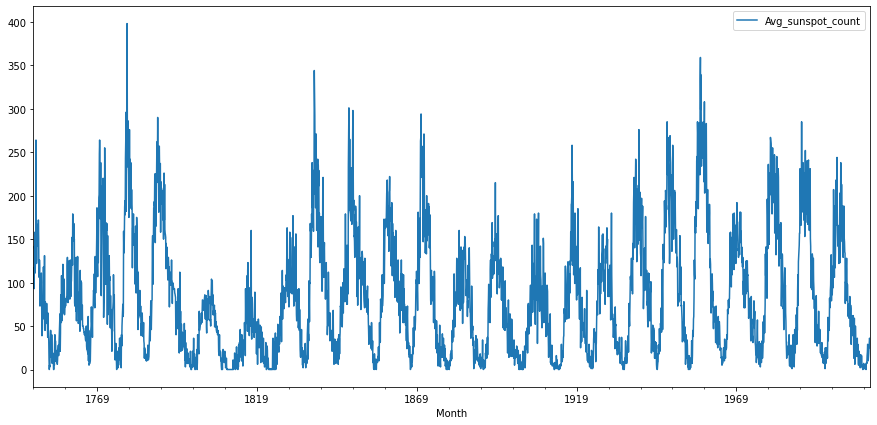

In [5]:
df.plot()

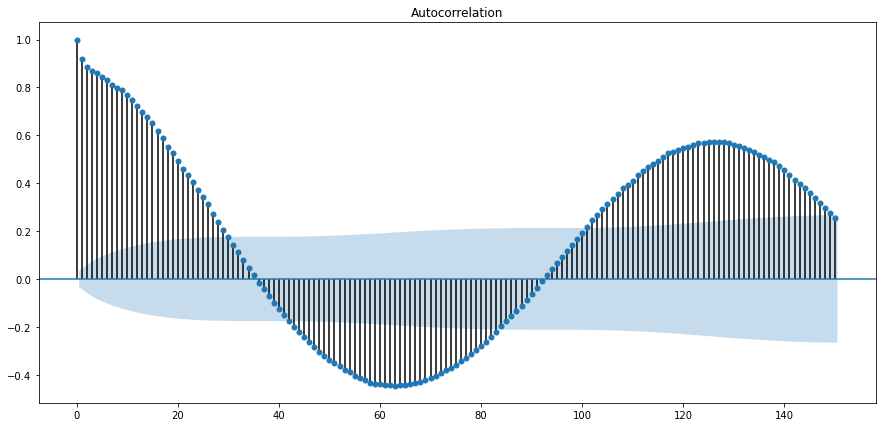

In [6]:
plot_acf(df,lags=150);

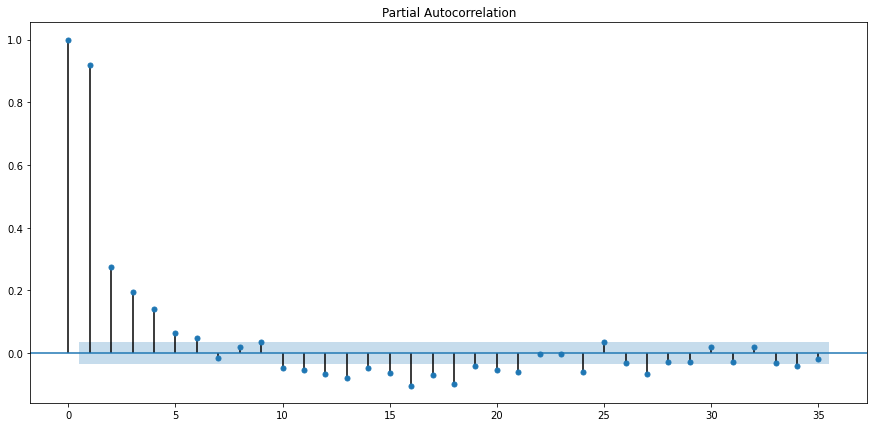

In [7]:
plot_pacf(df);

In [8]:
adfuller(df)

(-10.390308589912843,
 2.029076801912167e-18,
 28,
 3115,
 {'1%': -3.43245102630828,
  '5%': -2.862468302843017,
  '10%': -2.5672641578701927},
 28786.33743096589)

P value less than 0.05, thus the series is stationary

In [9]:
train_end = datetime(2005,12,1)
test_start = datetime(2006,1,1)

In [10]:
train = df[:train_end]
test = df[test_start:]

In [11]:
train

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142
...,...
2005-08-01,61
2005-09-01,37
2005-10-01,13


In [12]:
test

,Avg_sunspot_count
Month,
2006-01-01,21
2006-02-01,6
2006-03-01,17
2006-04-01,50
2006-05-01,37
2006-06-01,25
2006-07-01,22
2006-08-01,21
2006-09-01,24


In [14]:
import itertools
p = q = range(0, 11)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (0, 1, 5)
Model: (0, 1, 6)
Model: (0, 1, 7)
Model: (0, 1, 8)
Model: (0, 1, 9)
Model: (0, 1, 10)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (1, 1, 5)
Model: (1, 1, 6)
Model: (1, 1, 7)
Model: (1, 1, 8)
Model: (1, 1, 9)
Model: (1, 1, 10)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (2, 1, 5)
Model: (2, 1, 6)
Model: (2, 1, 7)
Model: (2, 1, 8)
Model: (2, 1, 9)
Model: (2, 1, 10)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (3, 1, 5)
Model: (3, 1, 6)
Model: (3, 1, 7)
Model: (3, 1, 8)
Model: (3, 1, 9)
Model: (3, 1, 10)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)
Model: (4, 1, 5)
Model: (4, 1, 6)
Model: (4, 1, 7)
Model: (4, 1, 8)
Model: (4, 1, 9)
Model: (4, 1, 10)
Model: (5, 1, 0)
Model: (5, 1, 1)
Model:

In [16]:
AIC_score = pd.DataFrame(columns=['param','AIC'])
AIC_score

,param,AIC


In [ ]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                AIC_score = AIC_score.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:29301.072541265654
ARIMA(0, 1, 1) - AIC:28819.036376178912
ARIMA(0, 1, 2) - AIC:28771.13867883644
ARIMA(0, 1, 3) - AIC:28773.12163410562
ARIMA(0, 1, 4) - AIC:28769.228806704305
ARIMA(0, 1, 5) - AIC:28770.389187334054
ARIMA(0, 1, 6) - AIC:28764.587217917004
ARIMA(0, 1, 7) - AIC:28765.5120462338
ARIMA(0, 1, 8) - AIC:28752.761190091333
ARIMA(0, 1, 9) - AIC:28711.000051020965
ARIMA(0, 1, 10) - AIC:28706.7871255856
ARIMA(1, 1, 0) - AIC:29004.691306528686
ARIMA(1, 1, 1) - AIC:28775.27709075746
ARIMA(1, 1, 2) - AIC:28773.12869673306
ARIMA(1, 1, 3) - AIC:28724.376663096125
ARIMA(1, 1, 4) - AIC:28706.19608112971
ARIMA(1, 1, 5) - AIC:28704.95819323902
ARIMA(1, 1, 6) - AIC:28699.319742248335
ARIMA(1, 1, 7) - AIC:28700.151429946105
ARIMA(1, 1, 8) - AIC:28692.820084096747
ARIMA(1, 1, 9) - AIC:28694.197032973738
ARIMA(1, 1, 10) - AIC:28688.76808318532
ARIMA(2, 1, 0) - AIC:28864.843185828497
ARIMA(2, 1, 1) - AIC:28771.22913171821
ARIMA(2, 1, 2) - AIC:28696.889315176006
ARIMA(2, 1

In [53]:
AIC_score.sort_values(by=['AIC'])

,Param,AIC,param
11,NaN,28901.265393,"(2, 1, 3)"
10,NaN,28901.353691,"(2, 1, 2)"
15,NaN,28903.240100,"(3, 1, 3)"
7,NaN,28928.787041,"(1, 1, 3)"
13,NaN,28974.533438,"(3, 1, 1)"
9,NaN,28976.381136,"(2, 1, 1)"
2,NaN,28976.386615,"(0, 1, 2)"
14,NaN,28976.416879,"(3, 1, 2)"
3,NaN,28978.375128,"(0, 1, 3)"
6,NaN,28978.379937,"(1, 1, 2)"


In [ ]:
model = ARIMA(train, order=(2,0,2))

results_Arima = model.fit()

print(results_Arima.summary())

In [55]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [56]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [57]:
ARIMA_predictions

2008-01-01   -5.325465
2008-02-01   -2.016585
2008-03-01   -1.259539
2008-04-01   -0.839462
2008-05-01   -0.600122
2008-06-01   -0.458387
2008-07-01   -0.369951
2008-08-01   -0.311143
2008-09-01   -0.269259
2008-10-01   -0.237436
2008-11-01   -0.211920
2008-12-01   -0.190621
2009-01-01   -0.172343
2009-02-01   -0.156371
2009-03-01   -0.142254
2009-04-01   -0.129691
2009-05-01   -0.118463
2009-06-01   -0.108403
2009-07-01   -0.099377
2009-08-01   -0.091271
2009-09-01   -0.083987
2009-10-01   -0.077439
2009-11-01   -0.071554
2009-12-01   -0.066262
2010-01-01   -0.061503
2010-02-01   -0.057225
2010-03-01   -0.053377
2010-04-01   -0.049918
2010-05-01   -0.046807
2010-06-01   -0.044009
2010-07-01   -0.041494
2010-08-01   -0.039232
2010-09-01   -0.037198
2010-10-01   -0.035369
2010-11-01   -0.033724
2010-12-01   -0.032245
Freq: MS, dtype: float64

In [68]:
ARIMA_pred=ARIMA_predictions.cumsum()
ARIMA_pred

2008-01-01    -5.325465
2008-02-01    -7.342049
2008-03-01    -8.601588
2008-04-01    -9.441050
2008-05-01   -10.041172
2008-06-01   -10.499559
2008-07-01   -10.869510
2008-08-01   -11.180653
2008-09-01   -11.449912
2008-10-01   -11.687348
2008-11-01   -11.899268
2008-12-01   -12.089890
2009-01-01   -12.262233
2009-02-01   -12.418604
2009-03-01   -12.560858
2009-04-01   -12.690549
2009-05-01   -12.809012
2009-06-01   -12.917415
2009-07-01   -13.016792
2009-08-01   -13.108063
2009-09-01   -13.192049
2009-10-01   -13.269489
2009-11-01   -13.341042
2009-12-01   -13.407304
2010-01-01   -13.468807
2010-02-01   -13.526032
2010-03-01   -13.579409
2010-04-01   -13.629327
2010-05-01   -13.676134
2010-06-01   -13.720143
2010-07-01   -13.761637
2010-08-01   -13.800869
2010-09-01   -13.838067
2010-10-01   -13.873435
2010-11-01   -13.907159
2010-12-01   -13.939404
Freq: MS, dtype: float64

In [69]:
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)
ARIMA_pred

,Avg_sunspot_count
2008-01-01,-5.325465
2008-02-01,-7.342049
2008-03-01,-8.601588
2008-04-01,-9.441050
2008-05-01,-10.041172
2008-06-01,-10.499559
2008-07-01,-10.869510
2008-08-01,-11.180653
2008-09-01,-11.449912
2008-10-01,-11.687348


In [73]:
predict_fc = ARIMA_pred.copy()
columns = train.columns
for col in columns:
    predict_fc[str(col)+'_forecast'] = train[col].iloc[-1] + predict_fc[str(col)]

In [74]:
columns

Index(['Avg_sunspot_count'], dtype='object')

In [75]:
predict_fc

,Avg_sunspot_count,Avg_sunspot_count_forecast
2008-01-01,-5.325465,11.674535
2008-02-01,-7.342049,9.657951
2008-03-01,-8.601588,8.398412
2008-04-01,-9.441050,7.558950
2008-05-01,-10.041172,6.958828
2008-06-01,-10.499559,6.500441
2008-07-01,-10.869510,6.130490
2008-08-01,-11.180653,5.819347
2008-09-01,-11.449912,5.550088
2008-10-01,-11.687348,5.312652


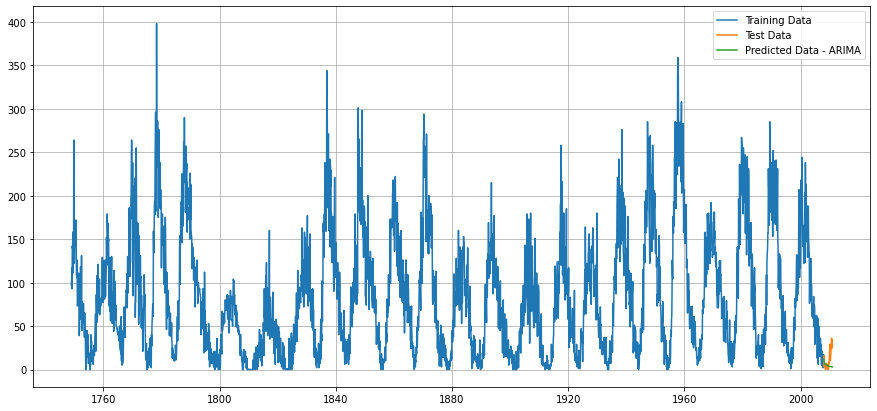

In [76]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predict_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [77]:
residuals = test['Avg_sunspot_count'] - predict_fc['Avg_sunspot_count_forecast']

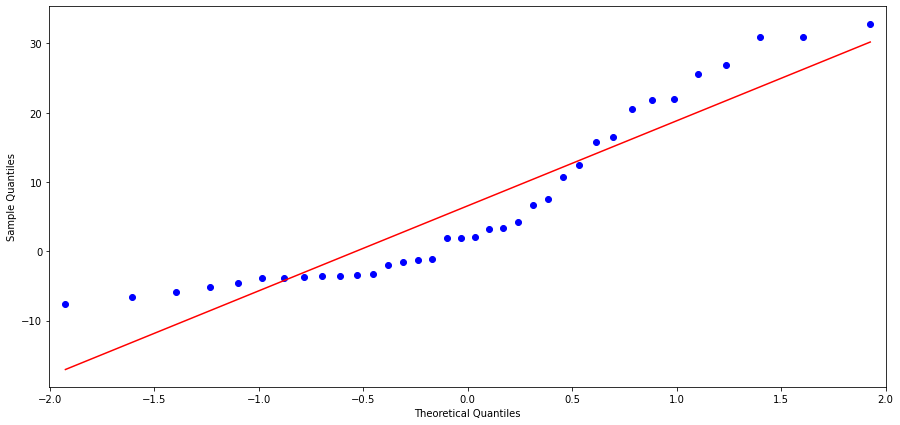

In [78]:
qqplot(residuals,line="s");

In [113]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],predict_fc['Avg_sunspot_count_forecast'],squared=False)
print('RMSE =',rmse)

RMSE = 13.904434508872242


In [111]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test['Avg_sunspot_count'],predict_fc['Avg_sunspot_count_forecast'])
print('MAPE = ',mape)

MAPE =  1214881581876903.0


,Month
0,2011-01-31
1,2011-02-28
2,2011-03-31
3,2011-04-30
4,2011-05-31
...,...
115,2020-08-31
116,2020-09-30
117,2020-10-31
118,2020-11-30


# SARIMA Model

In [91]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 1)(0, 1, 2, 12)
Model: (0, 1, 2)(1, 1, 0, 12)
Model: (0, 1, 2)(1, 1, 1, 12)


In [94]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [95]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:31475.62116752208
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:29305.78578833225
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:29179.579650058735
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:30616.66563426116
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:29297.464890712377
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:29176.013946663843
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:30078.267474703163
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:29182.200028487823
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:29171.302311006013
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:30872.550906417622
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:28821.636638046613
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:28695.58476575925
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:30017.10904620125
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:28811.10079898716
SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:28694.184829819045
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:29583.75257398394
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:28718.37576809342
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:2

In [96]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
77,"(2, 1, 2)","(1, 1, 2, 12)",28561.168815
80,"(2, 1, 2)","(2, 1, 2, 12)",28562.742730
74,"(2, 1, 2)","(0, 1, 2, 12)",28564.092579
79,"(2, 1, 2)","(2, 1, 1, 12)",28571.239706
23,"(0, 1, 2)","(1, 1, 2, 12)",28630.255902
...,...,...,...
36,"(1, 1, 1)","(0, 1, 0, 12)",30764.930254
9,"(0, 1, 1)","(0, 1, 0, 12)",30872.550906
54,"(2, 1, 0)","(0, 1, 0, 12)",31004.645812
27,"(1, 1, 0)","(0, 1, 0, 12)",31180.830518


In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train,
                                order=(2,1,2),
                                seasonal_order=(1,1,2,132),
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

In [98]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [123]:
SARIMA_predictions

2008-01-01    7.547424
2008-02-01    7.659652
2008-03-01    4.522939
2008-04-01    4.499471
2008-05-01    7.111153
2008-06-01    8.169545
2008-07-01    5.882600
2008-08-01    6.919361
2008-09-01    5.666903
2008-10-01    5.774206
2008-11-01    3.403804
2008-12-01    4.217269
2009-01-01    0.166786
2009-02-01    4.174487
2009-03-01    2.519637
2009-04-01    3.487295
2009-05-01    4.241858
2009-06-01    2.106627
2009-07-01    3.414391
2009-08-01    4.019827
2009-09-01    3.219518
2009-10-01    2.836315
2009-11-01    1.133406
2009-12-01    2.392235
2010-01-01   -1.771797
2010-02-01    0.805406
2010-03-01   -1.104321
2010-04-01   -0.407941
2010-05-01    2.606680
2010-06-01    3.917141
2010-07-01    2.063846
2010-08-01    3.357083
2010-09-01    2.365578
2010-10-01    2.679080
2010-11-01    0.536655
2010-12-01    1.553440
Freq: MS, dtype: float64

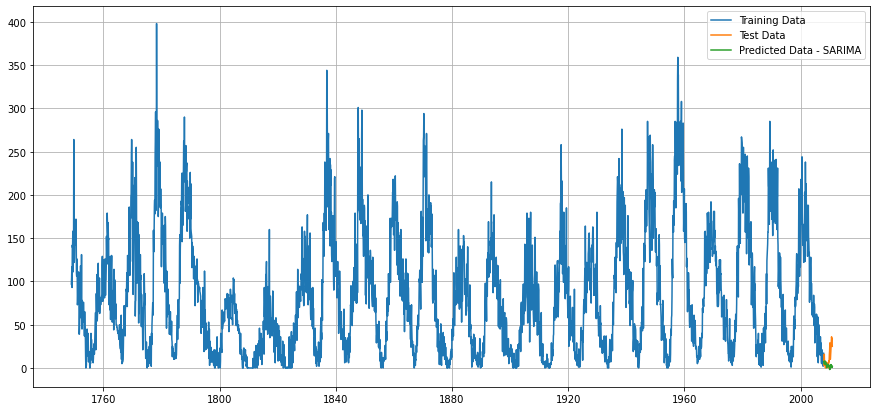

In [99]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [100]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],SARIMA_predictions, squared=False)
print(rmse)

14.909522410681832


In [153]:
mape = mean_absolute_percentage_error(SARIMA_predictions,test['Avg_sunspot_count'])
print('MAPE = ',mape)

MAPE =  7.22754188208659


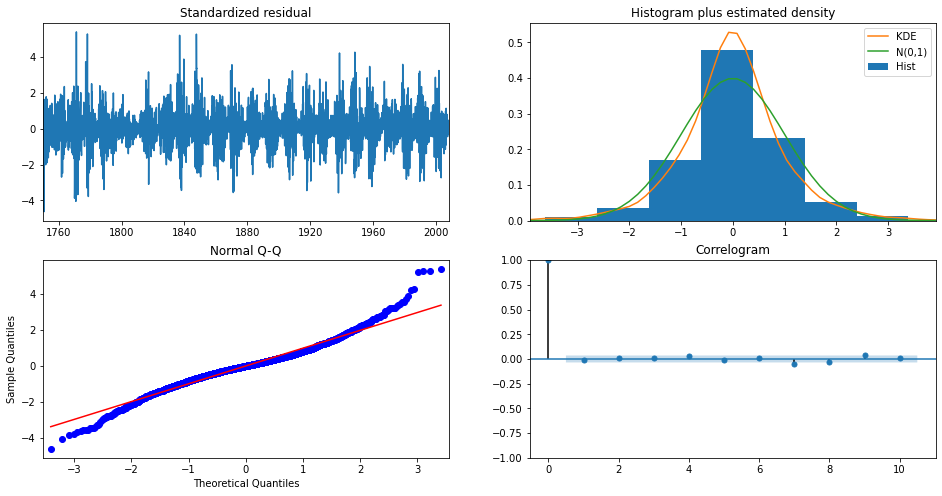

In [102]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [114]:
model = sm.tsa.statespace.SARIMAX(df,
                                order=(2,1,2),
                                seasonal_order=(1,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Avg_sunspot_count   No. Observations:                 3144
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 12)   Log Likelihood              -14423.267
Date:                            Sat, 09 Oct 2021   AIC                          28862.533
Time:                                    12:49:19   BIC                          28910.857
Sample:                                01-01-1749   HQIC                         28879.885
                                     - 12-01-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3318      0.022     59.317      0.000       1.288       1.376
ar.L2         -0.3823      0.023   

In [178]:
test = pd.read_csv('test_(2).csv')
test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [177]:
submission1 = pd.DataFrame()
submission1['Month'] = pd.date_range(start='01/01/2011',end='01/12/2020',freq='M',normalize=True)
submission1

,Month
0,2011-01-31
1,2011-02-28
2,2011-03-31
3,2011-04-30
4,2011-05-31
...,...
103,2019-08-31
104,2019-09-30
105,2019-10-31
106,2019-11-30


In [169]:
predictions  = model_Sarima.predict(start='01/01/2011', end='12/01/2020')
predictions = pd.DataFrame(predictions,columns=['predictions']).reset_index()
predictions


,index,predictions
0,2011-01-01,25.478529
1,2011-02-01,31.243384
2,2011-03-01,31.035501
3,2011-04-01,32.589322
4,2011-05-01,35.355942
...,...,...
115,2020-08-01,42.228668
116,2020-09-01,41.402563
117,2020-10-01,41.394470
118,2020-11-01,39.167354


In [179]:
test['Avg_sunspot_count'] = predictions['predictions']
test

,Month,Avg_sunspot_count
0,01-01-2011,25.478529
1,02-01-2011,31.243384
2,03-01-2011,31.035501
3,04-01-2011,32.589322
4,05-01-2011,35.355942
...,...,...
115,08-01-2020,42.228668
116,09-01-2020,41.402563
117,10-01-2020,41.394470
118,11-01-2020,39.167354


In [180]:
test.to_csv('Submission1_SushmaD.csv',index=False)